### Sobhan Moradian Daghigh 

* 1-31-2023
* SML Final Project

In [ ]:
# !pip install persiantools

In [180]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from persiantools.jdatetime import JalaliDate

### Loading Datas

In [338]:
iran_china_clay = pd.read_csv('./Datasets/Iran.China.Clay.csv')
iran_khodro = pd.read_csv('./Datasets/Iran.Khodro.csv')
s_mobarakeh_steel = pd.read_csv('./Datasets/S_Mobarakeh.Steel.csv')
social_sec_inv = pd.read_csv('./Datasets/Social.Sec.Inv.csv')
tose_atlas_mofid = pd.read_csv('./Datasets/ToseAtlasMofid.ETF.csv')
total_indices = pd.read_csv('./Datasets/Total_indices.csv')

datasets = [iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices]
names = ['iran_china_clay', 'iran_khodro', 's_mobarakeh_steel', 'social_sec_inv', 'tose_atlas_mofid', 'total_indices']

In [339]:
iran_china_clay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      2983 non-null   object 
 1   <DTYYYYMMDD>  2983 non-null   int64  
 2   <FIRST>       2983 non-null   float64
 3   <HIGH>        2983 non-null   float64
 4   <LOW>         2983 non-null   float64
 5   <CLOSE>       2983 non-null   float64
 6   <VALUE>       2983 non-null   int64  
 7   <VOL>         2983 non-null   int64  
 8   <OPENINT>     2983 non-null   int64  
 9   <PER>         2983 non-null   object 
 10  <OPEN>        2983 non-null   float64
 11  <LAST>        2983 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 279.8+ KB


In [340]:
iran_khodro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      4572 non-null   object 
 1   <DTYYYYMMDD>  4572 non-null   int64  
 2   <FIRST>       4572 non-null   float64
 3   <HIGH>        4572 non-null   float64
 4   <LOW>         4572 non-null   float64
 5   <CLOSE>       4572 non-null   float64
 6   <VALUE>       4572 non-null   int64  
 7   <VOL>         4572 non-null   int64  
 8   <OPENINT>     4572 non-null   int64  
 9   <PER>         4572 non-null   object 
 10  <OPEN>        4572 non-null   float64
 11  <LAST>        4572 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 428.8+ KB


In [341]:
s_mobarakeh_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      3507 non-null   object 
 1   <DTYYYYMMDD>  3507 non-null   int64  
 2   <FIRST>       3507 non-null   float64
 3   <HIGH>        3507 non-null   float64
 4   <LOW>         3507 non-null   float64
 5   <CLOSE>       3507 non-null   float64
 6   <VALUE>       3507 non-null   int64  
 7   <VOL>         3507 non-null   int64  
 8   <OPENINT>     3507 non-null   int64  
 9   <PER>         3507 non-null   object 
 10  <OPEN>        3507 non-null   float64
 11  <LAST>        3507 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 328.9+ KB


In [342]:
social_sec_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      547 non-null    object 
 1   <DTYYYYMMDD>  547 non-null    int64  
 2   <FIRST>       547 non-null    float64
 3   <HIGH>        547 non-null    float64
 4   <LOW>         547 non-null    float64
 5   <CLOSE>       547 non-null    float64
 6   <VALUE>       547 non-null    int64  
 7   <VOL>         547 non-null    int64  
 8   <OPENINT>     547 non-null    int64  
 9   <PER>         547 non-null    object 
 10  <OPEN>        547 non-null    float64
 11  <LAST>        547 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 51.4+ KB


In [343]:
tose_atlas_mofid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   <TICKER>      2085 non-null   object 
 1   <DTYYYYMMDD>  2085 non-null   int64  
 2   <FIRST>       2085 non-null   float64
 3   <HIGH>        2085 non-null   float64
 4   <LOW>         2085 non-null   float64
 5   <CLOSE>       2085 non-null   float64
 6   <VALUE>       2085 non-null   int64  
 7   <VOL>         2085 non-null   int64  
 8   <OPENINT>     2085 non-null   int64  
 9   <PER>         2085 non-null   object 
 10  <OPEN>        2085 non-null   float64
 11  <LAST>        2085 non-null   float64
dtypes: float64(6), int64(4), object(2)
memory usage: 195.6+ KB


In [344]:
total_indices

,<DTYYYYMMDD>,<VALUE>
0,1401/11/12,1557244.000
1,1401/11/11,1556551.900
2,1401/11/10,1539679.610
3,1401/11/9,1542190.690
4,1401/11/8,1600083.660
...,...,...
687,1399/1/11,547658.505
688,1399/1/10,545649.374
689,1399/1/9,532525.281
690,1399/1/6,521267.671


### Convert Jalali dates to Gregorian for "total_indices" dataset

In [345]:
cnvs = []
for ele in total_indices.iterrows():
    temp = ele[1]['<DTYYYYMMDD>'].split('/')
    cnvs.append(int(JalaliDate(int(temp[0]), int(temp[1]), int(temp[2])).to_gregorian().strftime('%Y%m%d')))
total_indices['<DTYYYYMMDD>'] = cnvs
total_indices

,<DTYYYYMMDD>,<VALUE>
0,20230201,1557244.000
1,20230131,1556551.900
2,20230130,1539679.610
3,20230129,1542190.690
4,20230128,1600083.660
...,...,...
687,20200330,547658.505
688,20200329,545649.374
689,20200328,532525.281
690,20200325,521267.671


### Filter last two years

In [346]:
def get_unique_dates(stocks):
    temp = [stock['<DTYYYYMMDD>'] for stock in stocks]
    intersect = list(set(temp[0]).intersection(*temp))
    intersect.sort()
    return intersect

def get_last_n_years(datasets, intersect, n=2, intersect_allow=False):
    # 20000 stands for two years
    filtered = []
    days = [x for x in intersect if x >= intersect[-1] - 20000]    
    for dataset in datasets:
        filtered.append(pd.DataFrame(dataset.loc[dataset['<DTYYYYMMDD>'].isin(days)]))
    return filtered

In [347]:
intersect = get_unique_dates(stocks=datasets)
[iran_china_clay, iran_khodro, s_mobarakeh_steel, social_sec_inv, tose_atlas_mofid, total_indices] = get_last_n_years(datasets, intersect, n=2)

In [348]:
# For example
iran_china_clay

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Iran.China.Clay,20230130,13950.0,13950.0,12920.0,13390.0,11241104520,848242,278,D,13590.0,13280.0
1,Iran.China.Clay,20230129,14290.0,14290.0,13580.0,13590.0,23948330970,1762501,227,D,14290.0,13580.0
2,Iran.China.Clay,20230128,14430.0,14600.0,14130.0,14290.0,27193111830,1902650,257,D,14870.0,14320.0
3,Iran.China.Clay,20230125,15480.0,15480.0,14310.0,14870.0,9138056240,623405,272,D,15040.0,14630.0
4,Iran.China.Clay,20230124,15100.0,15450.0,14850.0,15040.0,77890082770,5177631,313,D,14970.0,15350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,Iran.China.Clay,20210203,45240.0,47160.0,44000.0,45590.0,10627284120,239310,220,D,45940.0,44050.0
459,Iran.China.Clay,20210202,46560.0,46560.0,43900.0,45940.0,4610053900,103022,92,D,46070.0,44850.0
460,Iran.China.Clay,20210201,47440.0,47440.0,45810.0,46070.0,45890417410,998029,396,D,48220.0,46630.0
461,Iran.China.Clay,20210131,50600.0,50600.0,46000.0,48220.0,11802033730,247616,282,D,48400.0,47000.0


#### Ready to lunch the JET ))

### Part 1.

In [11]:
#           pi - pi-1
#    ri =  ___________      ; pi = <CLOSE>
#             pi-1

In [366]:
def cal_returns(stock):
    lst = stock.loc[:, '<CLOSE>']
    returns = []
    for i in range(len(lst) - 1):
        print(lst[i])
        print(lst[i + 1])
        print((lst[i + 1] - lst[i]) / lst[i])
        print()
        returns.append((lst[i + 1] - lst[i]) / lst[i])
    return returns

#### 1.A.

In [367]:
iran_khodro_returns = cal_returns(iran_khodro)

2837.0
2851.0
0.004934790271413465

2851.0
2990.0
0.04875482286916871

2990.0
3031.0
0.0137123745819398

3031.0
3135.0
0.03431210821511053

3135.0
3137.0
0.0006379585326953748

3137.0
3231.0
0.02996493465094039

3231.0
3284.0
0.01640359021974621

3284.0
3390.0
0.03227771010962241

3390.0
3473.0
0.02448377581120944

3473.0
3341.0
-0.03800748632306363

3341.0
3486.0
0.04340017958695001

3486.0
3460.0
-0.007458405048766495

3460.0
3424.0
-0.010404624277456647

3424.0
3411.0
-0.003796728971962617

3411.0
3250.0
-0.04720023453532688

3250.0
3216.0
-0.010461538461538461

3216.0
3074.0
-0.04415422885572139

3074.0
2934.0
-0.04554326610279766

2934.0
2821.0
-0.03851397409679618

2821.0
2884.0
0.022332506203473945

2884.0
2753.0
-0.045423023578363385

2753.0
2667.0
-0.03123864874682165

2667.0
2554.0
-0.04236970378702662

2554.0
2508.0
-0.018010963194988253

2508.0
2493.0
-0.005980861244019139

2493.0
2511.0
0.007220216606498195

2511.0
2624.0
0.04500199123855038

2624.0
2616.0
-0.0030487804878

KeyError: 39

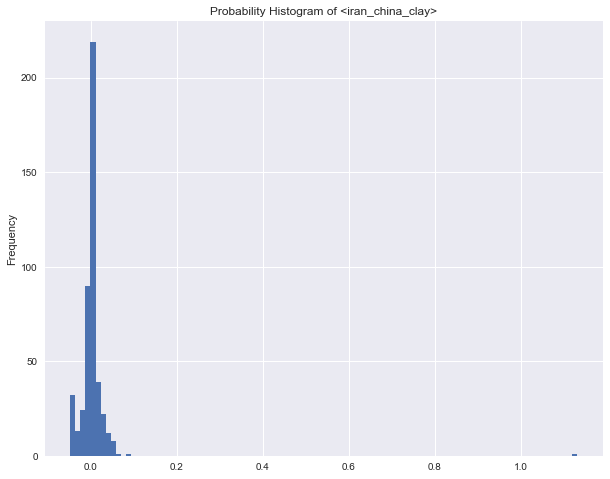

In [333]:
plotter(iran_china_clay_returns, name='iran_khodro_returns')

In [334]:
iran_china_clay

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
0,Iran.China.Clay,20230130,13950.0,13950.0,12920.0,13390.0,11241104520,848242,278,D,13590.0,13280.0
1,Iran.China.Clay,20230129,14290.0,14290.0,13580.0,13590.0,23948330970,1762501,227,D,14290.0,13580.0
2,Iran.China.Clay,20230128,14430.0,14600.0,14130.0,14290.0,27193111830,1902650,257,D,14870.0,14320.0
3,Iran.China.Clay,20230125,15480.0,15480.0,14310.0,14870.0,9138056240,623405,272,D,15040.0,14630.0
4,Iran.China.Clay,20230124,15100.0,15450.0,14850.0,15040.0,77890082770,5177631,313,D,14970.0,15350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
458,Iran.China.Clay,20210203,45240.0,47160.0,44000.0,45590.0,10627284120,239310,220,D,45940.0,44050.0
459,Iran.China.Clay,20210202,46560.0,46560.0,43900.0,45940.0,4610053900,103022,92,D,46070.0,44850.0
460,Iran.China.Clay,20210201,47440.0,47440.0,45810.0,46070.0,45890417410,998029,396,D,48220.0,46630.0
461,Iran.China.Clay,20210131,50600.0,50600.0,46000.0,48220.0,11802033730,247616,282,D,48400.0,47000.0


In [ ]:
---------------------------------------------------------------------------------------------------------------------

In [32]:
# iran_china_clay_returns = cal_returns(iran_china_clay)
# iran_khodro_returns = cal_returns(iran_khodro)
# s_mobarakeh_steel_returns = cal_returns(s_mobarakeh_steel)
# social_sec_inv_returns = cal_returns(social_sec_inv)
# tose_atlas_mofid_returns = cal_returns(tose_atlas_mofid)

In [67]:
def plotter(stock_returns, name):
    with plt.style.context('seaborn'):
        plt.figure(figsize=(10, 8))
        plt.hist(stock_returns, bins=100)
        plt.gca().set(title='Probability Histogram of <{}>'.format(name), ylabel='Frequency')
        plt.show()

In [92]:
# plotter(iran_china_clay_returns, name='iran_china_clay')
# plotter(iran_khodro_returns, name='iran_khodro')
# plotter(s_mobarakeh_steel_returns, name='s_mobarakeh_steel')
# plotter(social_sec_inv_returns, name='social_sec_inv')
# plotter(tose_atlas_mofid_returns, name='tose_atlas_mofid')

### Lets ignore outliers to get a better view

In [93]:
# iran_china_clay_returns_no_outlier = [x for x in iran_china_clay_returns if x < 0.2]
# plotter(iran_china_clay_returns_no_outlier, name='iran_china_clay_returns_no_outlier')

In [94]:
# social_sec_inv_returns_no_outlier = [x for x in social_sec_inv_returns if x < 0.2]
# plotter(social_sec_inv_returns_no_outlier, name='social_sec_inv_returns_no_outlier')

In [95]:
# s_mobarakeh_steel_returns_no_outlier = [x for x in s_mobarakeh_steel_returns if x < 0.2]
# plotter(s_mobarakeh_steel_returns_no_outlier, name='s_mobarakeh_steel_returns_no_outlier')